In [1]:
import slicetca
import torch
import numpy as np
import pandas as pd
import pickle
import scipy.ndimage as spnd
import scipy.stats as sps
import matplotlib.pyplot as plt
import matplotlib
import gdown

from functions import data_load, get_syllable_counts, get_max_length

In [2]:
dir = '/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT'
subjects = ['BCOM_18_2']
picks=['MEG 130', 'MEG 139','MEG 133','MEG 117','MEG 140','MEG 127','MEG 128','MEG 109','MEG 135','MEG 132','MEG 137',
 'MEG 131','MEG 129','MEG 118','MEG 134','MEG 136','MEG 141','MEG 116','MEG 114','MEG 115']

data_dict = data_load(dir, subjects, picks, avoid_overt=True)

Reading /Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT/BCOM_18_2_i_16-epo.fif ...
    Found the data of interest:
        t =    -300.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Reading /Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT/BCOM_18_2_me_34-epo.fif ...
    Found the data of interest:
        t =    -300.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
12 matching events found
No baseline correction applied
0 projection items activated
Reading /Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT/BCOM_18_2_sa_52-epo.fif ...
    Found the data of interest:
        t =    -300.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
13 matching events found
No baseline correcti

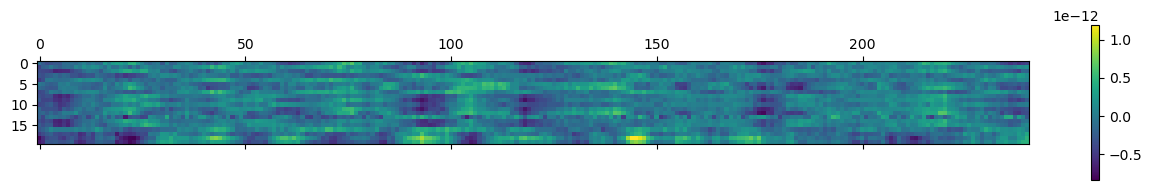

In [3]:
plt.matshow(data_dict['BCOM_18_2']['i_16'][0]) #Ok actually, the data does have negative values, so can't do naive NMF here
plt.colorbar()

In [63]:
data_dict['BCOM_18_2'].keys()

dict_keys(['i_16', 'me_34', 'sa_52', 'ra_42', 'le_24', 'a_12', 'si_56', 'mi_36', 'e_14', 'se_54', 'li_26', 'ti_66', 'ma_32', 're_44', 'ri_46', 'ta_62', 'te_64', 'la_22'])

In [ ]:
# she suggested I look at the avearge of the data

means = {}
sums = np.zeros([20, 241])
for subject in data_dict:
    for syllable in data_dict[subject]:
        for epoch in data_dict[subject][syllable]:
            sums += epoch
        print(sums.shape)
        mean = sums / len(data_dict[subject][syllable])
        means[syllable] = mean

for i in means:
    plt.matshow(means[i])
    plt.colorbar()
    plt.title(i)

In [13]:
device = "mps"
concatenated = np.array([])

# so, since we have different depths, numpy doesn't want to concatenate them smh. We will have to be clever
lengths = get_syllable_counts(data_dict)
max_length = get_max_length(lengths)
max_length
        

{'BCOM_18_2': 18}

In [64]:
i_tensor = np.array(data_dict['BCOM_18_2']['i_16'])
me_tensor = np.array(data_dict['BCOM_18_2']['me_34'])


In [67]:
i_tensor.shape
me_tensor.shape

(12, 20, 241)

In [68]:
combined = np.concatenate((i_tensor, me_tensor), axis=0)

In [69]:
combined.shape

(24, 20, 241)